Streaming output truncated to the last 5000 lines.
Epoch 5502/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3988
Epoch 5503/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3988
Epoch 5504/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3987
Epoch 5505/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3988
Epoch 5506/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3988
Epoch 5507/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3988
Epoch 5508/8000
1/1 [==============================] - 0s 5ms/step - loss: 9.3988
Epoch 5509/8000
1/1 [==============================] - 0s 5ms/step - loss: 9.3988
Epoch 5510/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3987
Epoch 5511/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3987
Epoch 5512/8000
1/1 [==============================] - 0s 6ms/step - loss: 9.3987
Epoch 5513/8000
1/1 [==========================

array([[98.6617  , 98.656586, 98.65409 , 98.65001 , 98.66    ]],
      dtype=float32)

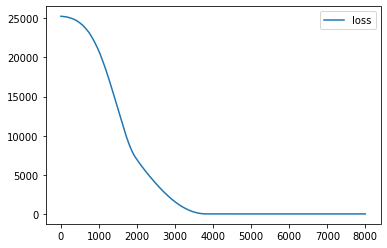

In [4]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
worksheet = gc.open('data').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df.head()
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.dtypes
X=df[['input']].values
X
Y=df[['output']].values
Y
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=50)
X_train
scaler=MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train1=scaler.transform(X_train)
X_test1=scaler.transform(X_test)
X_train1
ai_brain=Sequential([
    Dense(5,activation='relu'),
    Dense(4,activation='relu'),
    Dense(5)
])
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(X_train1,Y_train,epochs=8000)
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()
ai_brain.evaluate(X_test1,Y_test)
input=[[100]]
input1=scaler.transform(input)
input1.shape
ai_brain.predict(input1)

In [5]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [6]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
worksheet = gc.open('data').sheet1
rows = worksheet.get_all_values()

In [9]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df.head()

,input,output
0,2,3
1,4,5
2,7,8
3,67,68
4,78,69


In [10]:
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.dtypes

input     float64
output    float64
dtype: object

In [11]:
X=df[['input']].values
X

array([[  2.],
       [  4.],
       [  7.],
       [ 67.],
       [ 78.],
       [ 88.],
       [100.],
       [123.],
       [144.],
       [156.],
       [187.],
       [235.],
       [377.]])

In [12]:
Y=df[['output']].values
Y

array([[  3.],
       [  5.],
       [  8.],
       [ 68.],
       [ 69.],
       [ 89.],
       [101.],
       [124.],
       [145.],
       [157.],
       [188.],
       [236.],
       [378.]])

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=50)


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=50)
X_train

array([[123.],
       [144.],
       [ 88.],
       [100.],
       [ 78.],
       [  4.],
       [377.],
       [  2.]])

In [16]:
X=df[['input']].values
X
Y=df[['output']].values
Y

array([[  3.],
       [  5.],
       [  8.],
       [ 68.],
       [ 69.],
       [ 89.],
       [101.],
       [124.],
       [145.],
       [157.],
       [188.],
       [236.],
       [378.]])

In [17]:
scaler=MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)

MinMaxScaler()

In [18]:
ai_brain.evaluate(X_test1,Y_test)

1/1 [==============================] - 0s 22ms/step - loss: 3.0455


3.0455384254455566

In [19]:
X_test1=scaler.transform(X_test)
X_test1

array([[1.        ],
       [0.78947368],
       [0.65350877],
       [0.26315789],
       [0.        ]])

In [20]:
ai_brain.evaluate(X_test1,Y_test)

1/1 [==============================] - 0s 21ms/step - loss: 3.0455


3.0455384254455566

In [22]:
input=[[100]]
input1=scaler.transform(input)
input1

array([[0.40789474]])

In [23]:
ai_brain.predict(input1)

array([[98.6617  , 98.656586, 98.65409 , 98.65001 , 98.66    ]],
      dtype=float32)